# Wine classification using random forest 

In [61]:
import pandas as pd

names=[
    'label', 
    'alcohol', 
    'malic_acid', 
    'ash', 
    'alcalinity_ash', 
    'magnesium', 
    'total_phenols', 
    'flavonoids', 
    'nonflavanoid_phenols', 
    'proanthocyanins', 
    'color_intensity', 
    'hue', 
    'diluted_wines', 
    'proline'
]

df = pd.read_csv('wine.data', header=None, names=names)

df.head(10)

,label,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavonoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [62]:
df.describe()

,label,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavonoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Class distribution

<AxesSubplot: >

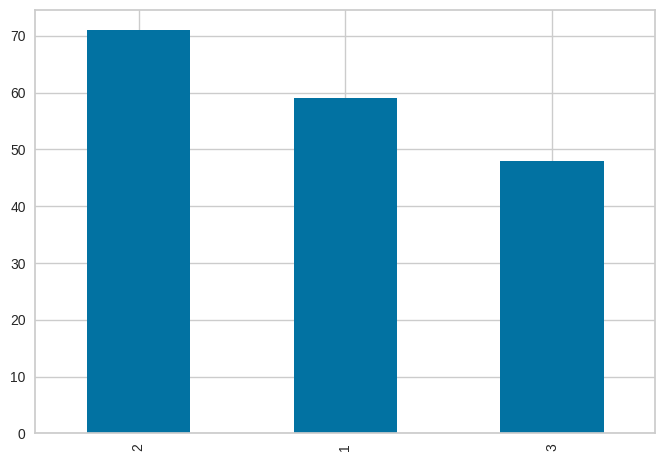

In [63]:
df.label.value_counts().plot(kind='bar')

In [64]:
y = df.pop('label')
X = df

### Learn

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
}

model_ = GridSearchCV(estimator = RandomForestClassifier(random_state=0, n_jobs=-1), 
                      cv=5,
                      verbose=1,
                      scoring='accuracy',
                      param_grid=params, 
                      n_jobs=-1)

In [66]:
model_.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [67]:
model_.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}

In [68]:
model_.best_score_

0.9833333333333332

### Bias vs Variance

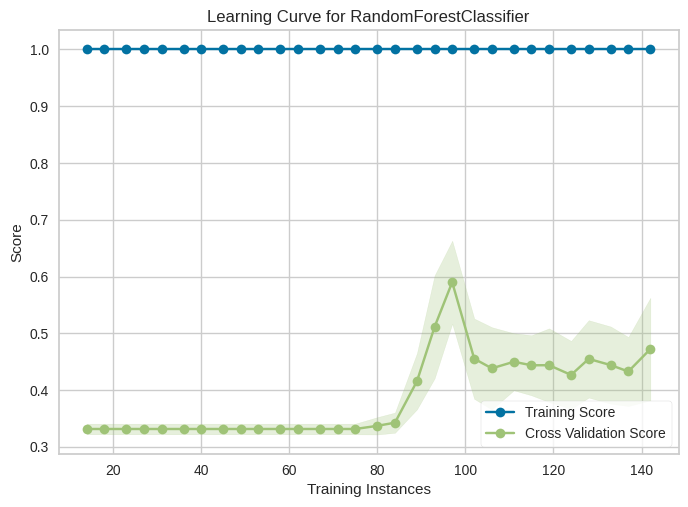

<AxesSubplot: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [69]:
import numpy as np
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.1, 1.0, 30)

X_lc = OneHotEncoder().fit_transform(X)
y_lc = LabelEncoder().fit_transform(y)

# Instantiate the classification model and visualizer
model = RandomForestClassifier(**model_.best_estimator_.get_params())
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=-1,
    random_state=0
)

visualizer.fit(X_lc, y_lc)
visualizer.show()


### Conclusions

- The training and test scores have not converged, so potentially this model would benefit from more training data.
- This model suffers from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.